### DATA CURATION PROJECT - ANALYSIS OF COCA-COLA CONSOLIDATED STATEMENTS OF INCOME (2009-2019)

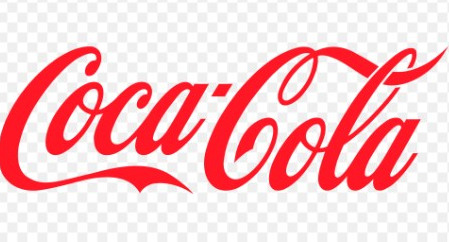

Coca-Cola, a global icon in the beverage industry, has set a benchmark for success with its consistent financial performance over the years. As a consultant to another beverage company, analyzing Coca-Cola's consolidated statements of income from 2009 to 2019 has revealed valuable patterns that can be emulated to drive growth and profitability. This project aims to uncover these patterns and provide insights for leveraging Coca-Cola's success in the context of another beverage company's operations.

An **income statement** provides a summary of a company's revenues and expenses over a specific period. It is used to assess the profitability and financial health of a company.

In [ ]:
# Import the necessary libraries
import pandas as pd
#import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Load the Coca-Cola financial data into a Pandas DataFrame
df = pd.read_csv('/content/coca-cola-income-statement.csv')
df.set_index(df.columns[0], inplace=True)

# Select data from 2009-2019
df.drop(columns=['2020'], inplace=True)
print(df.shape)
df

(20, 11)


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Metrics ($ in millions),,,,,,,,,,,
NET OPERATING REVENUES,30990.00,35119.00,46542.00,48017.00,46854.00,45998.00,44294.00,41863.00,35410.00,34300.00,37266.00
Cost of goods sold,11088.00,12693.00,18216.00,19053.00,18421.00,17889.00,17482.00,16465.00,13256.00,13067.00,14619.00
GROSS PROFIT,19902.00,22426.00,28326.00,28964.00,28433.00,28109.00,26812.00,25398.00,22154.00,21233.00,22647.00
Selling general and administrative expenses,11358.00,13158.00,17440.00,17738.00,17310.00,17218.00,16427.00,15262.00,12496.00,11002.00,12103.00
Other operating charges,313.00,819.00,732.00,447.00,895.00,1183.00,1657.00,1510.00,2157.00,1079.00,458.00
OPERATING INCOME,8231.00,8449.00,10154.00,10779.00,10228.00,9708.00,8728.00,8626.00,7501.00,9152.00,10086.00
Interest income,249.00,317.00,483.00,471.00,534.00,594.00,613.00,642.00,677.00,689.00,563.00
Interest expense,355.00,733.00,417.00,397.00,463.00,483.00,856.00,733.00,841.00,950.00,946.00
Equity income (loss) - net,781.00,1025.00,690.00,819.00,602.00,769.00,489.00,835.00,1071.00,1008.00,1049.00


In [ ]:
# Define the new row labels
new_row_labels = ['Net Revenue', 'COGS', 'Gross Profit', 'SG&A Expenses', 'Other Operating Charges',
                  'Operating Income', 'Interest Income', 'Interest Expense', 'Equity Income/Loss',
                  'Other Income/Loss', 'Pre-tax Income', 'Income Tax', 'Net Income', 'Net Income - Noncontrolling Interests',
                  'Net Income - Coca-Cola Shareholders', 'Basic EPS', 'Diluted EPS', 'Avg Shares Outstanding',
                  'Dilutive Securities', 'Avg Shares Outstanding - Diluted']

In [ ]:
# Set the new row labels as the index
df = df.set_index(pd.Index(new_row_labels))

In [ ]:
# Rename the first column to 'Metrics ($ in millions)'
df = df.reset_index().rename(columns={'index': 'Metrics ($ in millions)'})
df

,Metrics ($ in millions),2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Net Revenue,30990.00,35119.00,46542.00,48017.00,46854.00,45998.00,44294.00,41863.00,35410.00,34300.00,37266.00
1,COGS,11088.00,12693.00,18216.00,19053.00,18421.00,17889.00,17482.00,16465.00,13256.00,13067.00,14619.00
2,Gross Profit,19902.00,22426.00,28326.00,28964.00,28433.00,28109.00,26812.00,25398.00,22154.00,21233.00,22647.00
3,SG&A Expenses,11358.00,13158.00,17440.00,17738.00,17310.00,17218.00,16427.00,15262.00,12496.00,11002.00,12103.00
4,Other Operating Charges,313.00,819.00,732.00,447.00,895.00,1183.00,1657.00,1510.00,2157.00,1079.00,458.00
5,Operating Income,8231.00,8449.00,10154.00,10779.00,10228.00,9708.00,8728.00,8626.00,7501.00,9152.00,10086.00
6,Interest Income,249.00,317.00,483.00,471.00,534.00,594.00,613.00,642.00,677.00,689.00,563.00
7,Interest Expense,355.00,733.00,417.00,397.00,463.00,483.00,856.00,733.00,841.00,950.00,946.00
8,Equity Income/Loss,781.00,1025.00,690.00,819.00,602.00,769.00,489.00,835.00,1071.00,1008.00,1049.00
9,Other Income/Loss,40.00,5185.00,529.00,137.00,576.00,-1263.00,631.00,-1234.00,-1666.00,-1674.00,34.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Metrics ($ in millions)  20 non-null     object 
 1   2009                     20 non-null     float64
 2   2010                     20 non-null     float64
 3   2011                     20 non-null     float64
 4   2012                     20 non-null     float64
 5   2013                     20 non-null     float64
 6   2014                     20 non-null     float64
 7   2015                     20 non-null     float64
 8   2016                     20 non-null     float64
 9   2017                     20 non-null     float64
 10  2018                     20 non-null     float64
 11  2019                     20 non-null     float64
dtypes: float64(11), object(1)
memory usage: 2.0+ KB


In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2009,20.0,5638.4440,8047.430598,2.93,207.25,2177.0,8409.75,30990.0
2010,20.0,7247.2590,9234.079832,5.06,629.00,2358.5,12067.50,35119.0
2011,20.0,7984.7220,11990.227403,3.69,466.50,2303.5,10475.25,46542.0
2012,20.0,8434.8985,12287.733185,1.97,332.00,3613.5,11036.50,48017.0
2013,20.0,8245.8920,11959.043391,1.90,516.25,3642.5,10540.25,46854.0
2014,20.0,7768.2610,11800.743696,-1263.00,378.00,3294.0,9420.75,45998.0
2015,20.0,7668.9180,11249.896044,1.67,582.00,3295.5,8947.25,44294.0
2016,20.0,7082.9500,10686.962471,-1234.00,494.00,2951.5,8258.50,41863.0
2017,20.0,5870.6790,9089.526746,-1666.00,520.75,1720.0,6931.75,35410.0
2018,20.0,6116.6505,8740.829269,-1674.00,527.25,3004.0,8456.75,34300.0


## Water Fall chart for Net Income

<Figure size 1200x800 with 0 Axes>

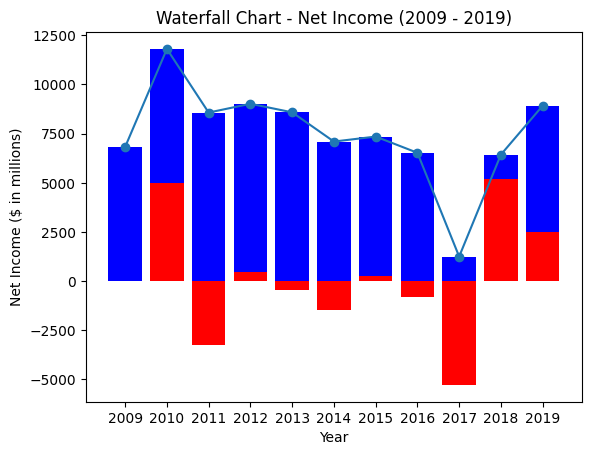

In [ ]:
# Create a waterfall chart
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
net_income = [6824, 11809, 8572, 9019, 8584, 7098, 7351, 6527, 1248, 6434, 8920]
changes = [net_income[i+1] - net_income[i] for i in range(len(net_income)-1)]

plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
ax.bar(years, net_income, color='b')
ax.bar(years[1:], changes, color='r')
ax.plot(years, net_income, marker='o', linestyle='-')

plt.title('Waterfall Chart - Net Income (2009 - 2019)')
plt.xlabel('Year')
plt.ylabel('Net Income ($ in millions)')
plt.show()

In [ ]:
# Rename the index
df.rename(columns={'Metrics ($ in millions)': 'Year'}, inplace=True)

# Transpose the DataFrame so that the financial metrics are in the columns
income_df = df.copy()
income_df = df.set_index('Year').T

In [ ]:
income_df

Year,Net Revenue,COGS,Gross Profit,SG&A Expenses,Other Operating Charges,Operating Income,Interest Income,Interest Expense,Equity Income/Loss,Other Income/Loss,Pre-tax Income,Income Tax,Net Income,Net Income - Noncontrolling Interests,Net Income - Coca-Cola Shareholders,Basic EPS,Diluted EPS,Avg Shares Outstanding,Dilutive Securities,Avg Shares Outstanding - Diluted
2009,30990.0,11088.0,19902.0,11358.0,313.0,8231.0,249.0,355.0,781.0,40.0,8946.0,2040.0,6906.0,82.0,6824.0,2.95,2.93,2314.0,15.0,2329.0
2010,35119.0,12693.0,22426.0,13158.0,819.0,8449.0,317.0,733.0,1025.0,5185.0,14243.0,2384.0,11859.0,50.0,11809.0,5.12,5.06,2308.0,25.0,2333.0
2011,46542.0,18216.0,28326.0,17440.0,732.0,10154.0,483.0,417.0,690.0,529.0,11439.0,2805.0,8634.0,62.0,8572.0,3.75,3.69,2284.0,39.0,2323.0
2012,48017.0,19053.0,28964.0,17738.0,447.0,10779.0,471.0,397.0,819.0,137.0,11809.0,2723.0,9086.0,67.0,9019.0,2.00,1.97,4504.0,80.0,4584.0
2013,46854.0,18421.0,28433.0,17310.0,895.0,10228.0,534.0,463.0,602.0,576.0,11477.0,2851.0,8626.0,42.0,8584.0,1.94,1.90,4434.0,75.0,4509.0
2014,45998.0,17889.0,28109.0,17218.0,1183.0,9708.0,594.0,483.0,769.0,-1263.0,9325.0,2201.0,7124.0,26.0,7098.0,1.62,1.60,4387.0,63.0,4450.0
2015,44294.0,17482.0,26812.0,16427.0,1657.0,8728.0,613.0,856.0,489.0,631.0,9605.0,2239.0,7366.0,15.0,7351.0,1.69,1.67,4352.0,53.0,4405.0
2016,41863.0,16465.0,25398.0,15262.0,1510.0,8626.0,642.0,733.0,835.0,-1234.0,8136.0,1586.0,6550.0,23.0,6527.0,1.51,1.49,4317.0,50.0,4367.0
2017,35410.0,13256.0,22154.0,12496.0,2157.0,7501.0,677.0,841.0,1071.0,-1666.0,6742.0,5560.0,1283.0,35.0,1248.0,0.29,0.29,4272.0,52.0,4324.0
2018,34300.0,13067.0,21233.0,11002.0,1079.0,9152.0,689.0,950.0,1008.0,-1674.0,8225.0,1749.0,6476.0,42.0,6434.0,1.51,1.50,4259.0,40.0,4299.0


### Trend Analysis:
We can analyze the trends in revenue, expenses, and net income over the years to identify patterns and understand the company's financial performance. This can be done by plotting line charts or using statistical techniques like time series analysis.


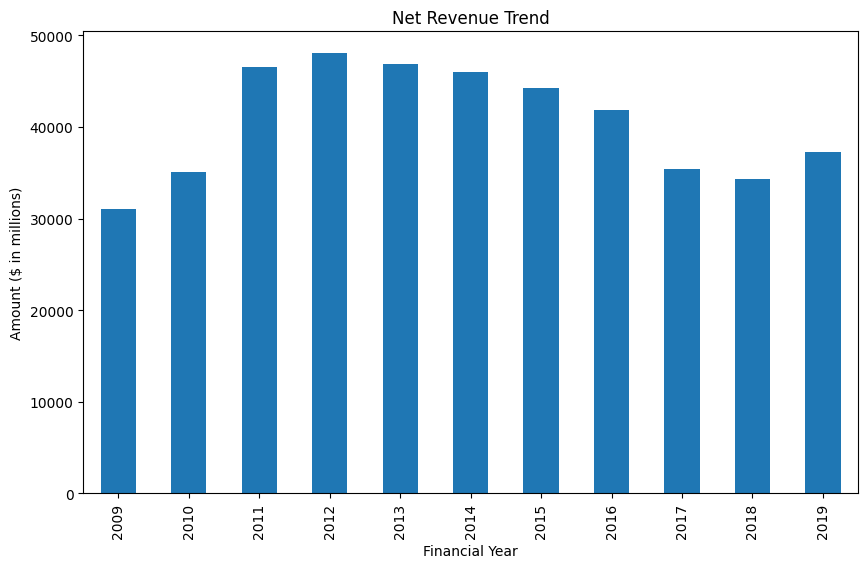

In [ ]:
# Plot Net Revenue trend over time
plt.figure(figsize=(10, 6))
income_df['Net Revenue'].plot(kind='bar')
plt.title('Net Revenue Trend')
plt.xlabel('Financial Year')
plt.ylabel('Amount ($ in millions)')
plt.show()

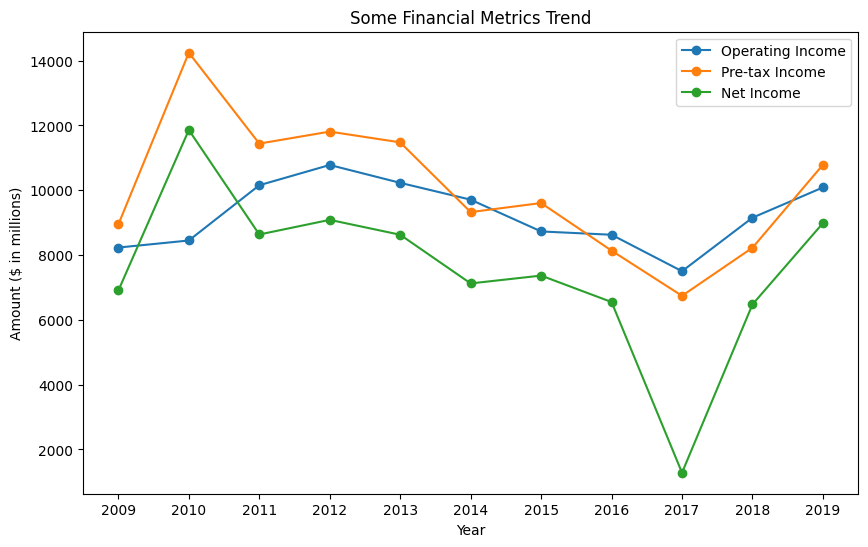

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(income_df.index, income_df['Operating Income'], marker='o', linestyle='-', label='Operating Income')
plt.plot(income_df.index, income_df['Pre-tax Income'], marker='o', linestyle='-', label='Pre-tax Income')
plt.plot(income_df.index, income_df['Net Income'], marker='o', linestyle='-', label='Net Income')
plt.title('Some Financial Metrics Trend')
plt.xlabel('Year')
plt.ylabel('Amount ($ in millions)')
plt.legend()
plt.show()

## Trend of Earnings per share

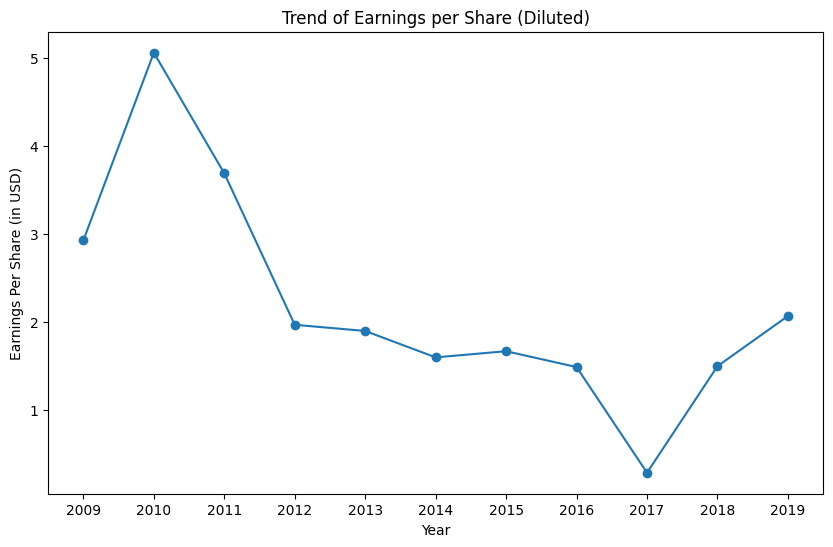

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(income_df.index, income_df['Diluted EPS'], marker='o', linestyle='-')
plt.title('Trend of Earnings per Share (Diluted)')
plt.xlabel('Year')
plt.ylabel('Earnings Per Share (in USD)')
plt.show()

Summary of the trend depicted above:

- In 2009, the earnings per share were just over 1 USD.
- In 2010, there was a significant peak with earnings exceeding 5 USD.
- From 2010 to 2012, there was a sharp decline to approximately 1 USD again.
- Earnings per share remained relatively flat but slightly declining between 2012 and 2016, hovering around the 1 USD mark.
- There was a decrease in 2017 where earnings per share dipped below 1 USD.
- However, in the subsequent years, there was a recovery with earnings per share rising back above 1 USD by 2019, although not reaching the heights of 2010.

The graph shows significant volatility in earnings per share over the ten-year period, with a noteworthy peak in 2010 and a low point in 2017.

## Some Financial Ratios

In [ ]:
# Create a new DataFrame to store the ratios
ratio_df = pd.DataFrame()

# Calculate Gross Profit Margin
ratio_df['Gross Profit Margin'] = (income_df['Gross Profit'] / income_df['Net Revenue']) * 100

# Calculate Operating Margin
ratio_df['Operating Margin'] = (income_df['Operating Income'] / income_df['Net Revenue']) * 100

# Calculate Net Profit Margin
ratio_df['Net Profit Margin'] = (income_df['Net Income - Coca-Cola Shareholders'] / income_df['Net Revenue']) * 100

# Calculate Net Income Margin
ratio_df['Net Income Margin'] = (income_df['Net Income'] / income_df['Net Revenue']) * 100

# Calculate Earnings Per Share
ratio_df['Earnings Per Share'] = income_df['Net Income'] / income_df['Avg Shares Outstanding - Diluted']

In [ ]:
# Display the DataFrame of Financial Ratios
ratio_df.reset_index().rename(columns={'index': 'Year'})

,Year,Gross Profit Margin,Operating Margin,Net Profit Margin,Net Income Margin,Earnings Per Share
0,2009,64.220716,26.560181,22.020006,22.284608,2.965221
1,2010,63.857171,24.058202,33.625673,33.768046,5.083155
2,2011,60.861158,21.816854,18.417773,18.550986,3.716746
3,2012,60.320303,22.448300,18.782931,18.922465,1.982112
4,2013,60.684253,21.829513,18.320741,18.410381,1.913063
5,2014,61.109179,21.105265,15.431106,15.487630,1.600899
6,2015,60.531900,19.704700,16.595927,16.629792,1.672191
7,2016,60.669326,20.605308,15.591334,15.646275,1.499886
8,2017,62.564247,21.183282,3.524428,3.623270,0.296716
9,2018,61.903790,26.682216,18.758017,18.880466,1.506397


## Visualization of the Financial Ratios

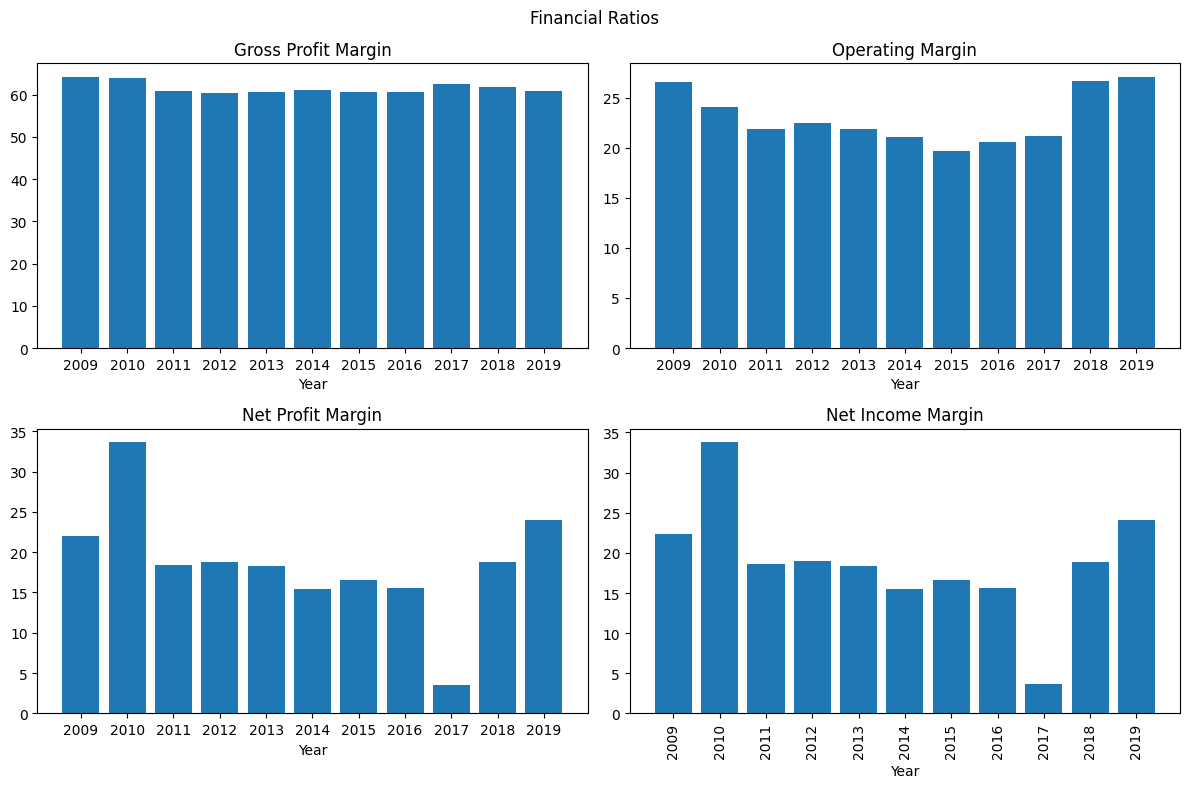

In [ ]:
# Create a 2x2 subplot of bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the Gross Profit Margin
axes[0, 0].bar(ratio_df.index, ratio_df['Gross Profit Margin'])
axes[0, 0].set_title('Gross Profit Margin')
axes[0, 0].set_xlabel('Year')

# Plot the Operating Margin
axes[0, 1].bar(ratio_df.index, ratio_df['Operating Margin'])
axes[0, 1].set_title('Operating Margin')
axes[0, 1].set_xlabel('Year')

# Plot the Net Profit Margin
axes[1, 0].bar(ratio_df.index, ratio_df['Net Profit Margin'])
axes[1, 0].set_title('Net Profit Margin')
axes[1, 0].set_xlabel('Year')

# Plot the Net Income Margin
axes[1, 1].bar(ratio_df.index, ratio_df['Net Income Margin'])
axes[1, 1].set_title('Net Income Margin')
axes[1, 1].set_xlabel('Year')

# Add a title and adjust the layout
plt.suptitle('Financial Ratios')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Patterns in Coca-Cola's Financial Performance

**Gross Profit Margin and Cost Management**:
One striking pattern observed in Coca-Cola's financial data is the steady Gross Profit Margin, averaging around 60-64% over the years. This indicates effective cost management and production efficiency, which can be replicated by optimizing production processes, negotiating favorable procurement contracts, and implementing stringent cost control measures in the other beverage company's operations. By focusing on maintaining a healthy Gross Profit Margin, the company can ensure sustainable profitability even in the face of market fluctuations.

**Operating Efficiency and Profitability**:
Coca-Cola's Operating Margin and Net Profit Margin have exhibited resilience, reflecting the company's ability to generate profits from its core business activities. The Operating Margin has consistently remained above 19%, indicating efficient operational management. Similarly, the Net Profit Margin has remained robust, averaging around 18-23% over the years. Emulating this pattern involves streamlining operations, enhancing productivity, and optimizing resource allocation to drive profitability. By prioritizing operational efficiency, the other beverage company can enhance its bottom line and create a sustainable competitive advantage.

**Earnings Per Share and Shareholder Value**:
The consistent growth in Earnings Per Share (EPS) is another noteworthy pattern in Coca-Cola's financial performance. The EPS has shown an upward trend, indicating the company's ability to generate value for its shareholders. This pattern can be replicated by focusing on strategic growth initiatives, effective capital allocation, and delivering consistent financial performance.